# Statistical & Machine Learning Approaches for Marketing

## Homework Session 4

In [39]:
#Load required packages
packages <- c('ISLR', 'tidyverse', 'ggthemes', 'caret', 'doMC', 'gbm', 'knitr')
sapply(packages, require, character.only = TRUE)

Loading required package: ggthemes

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'ggthemes'"
Loading required package: doMC

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'doMC'"


ISLR tidyverse  ggthemes     caret      doMC       gbm     knitr 
     TRUE      TRUE     FALSE      TRUE     FALSE      TRUE      TRUE

### Exercise 3 Chapter 8 Page 332

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of ˆpm1. The x-axis should display ˆpm1, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy. Hint: In a setting with two classes, ˆpm1 = 1 − ˆpm2. You could make this plot by hand, but it will be much easier to make in R.

In [40]:
p <- seq(0, 1, 0.01)
p

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
 [16] 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 [31] 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44
 [46] 0.45 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59
 [61] 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74
 [76] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 [91] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

In [41]:
gini.index <- 2 * p * (1 - p)
gini.index

[1] 0.0000 0.0198 0.0392 0.0582 0.0768 0.0950 0.1128 0.1302 0.1472 0.1638
 [11] 0.1800 0.1958 0.2112 0.2262 0.2408 0.2550 0.2688 0.2822 0.2952 0.3078
 [21] 0.3200 0.3318 0.3432 0.3542 0.3648 0.3750 0.3848 0.3942 0.4032 0.4118
 [31] 0.4200 0.4278 0.4352 0.4422 0.4488 0.4550 0.4608 0.4662 0.4712 0.4758
 [41] 0.4800 0.4838 0.4872 0.4902 0.4928 0.4950 0.4968 0.4982 0.4992 0.4998
 [51] 0.5000 0.4998 0.4992 0.4982 0.4968 0.4950 0.4928 0.4902 0.4872 0.4838
 [61] 0.4800 0.4758 0.4712 0.4662 0.4608 0.4550 0.4488 0.4422 0.4352 0.4278
 [71] 0.4200 0.4118 0.4032 0.3942 0.3848 0.3750 0.3648 0.3542 0.3432 0.3318
 [81] 0.3200 0.3078 0.2952 0.2822 0.2688 0.2550 0.2408 0.2262 0.2112 0.1958
 [91] 0.1800 0.1638 0.1472 0.1302 0.1128 0.0950 0.0768 0.0582 0.0392 0.0198
[101] 0.0000

In [42]:
class.error <- 1 - pmax(p, 1 - p)
cross.entropy <- - (p * log(p) + (1 - p) * log(1 - p))

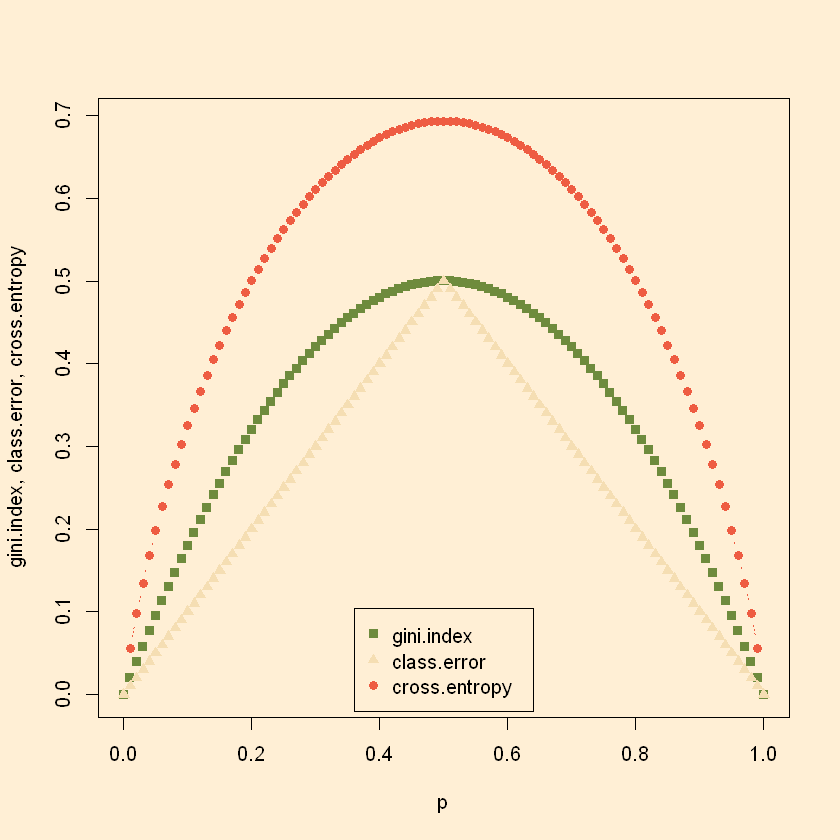

In [43]:
par(bg = "papayawhip")
matplot(p, cbind(gini.index, class.error, cross.entropy), pch=c(15,17,19) ,ylab = "gini.index, class.error, cross.entropy",col = c("darkolivegreen4" , "wheat", "tomato2"), type = 'b')
legend('bottom', inset=.01, legend = c('gini.index', 'class.error', 'cross.entropy'), col = c("darkolivegreen4" , "wheat", "tomato2"), pch=c(15,17,19))

### Exercise 5 Chapter 8 Page 332

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X) : 0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7,and 0.75.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

Approach 1 : Majority vote approach

6 of the 10 classification probabilities predict a red class. Hence Prediction : RED

Approach 2 : Average probability approach

The average of the probability :

In [44]:
(0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75)/10

[1] 0.45

The average probability < 0.5

Hence predicted : BLUE

## Applied Questions

### Exercise 8 Chapter 8 Page 333

In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

(a) Split the data set into a training set and a test set.

In [45]:
library(tree)
library(ISLR)
attach(Carseats)

set.seed(1)
train <- sample(1:nrow(Carseats), nrow(Carseats)/2)
car_train <- Carseats[train, ]
car_test <- Carseats[-train, ]

The following objects are masked from Carseats (pos = 17):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

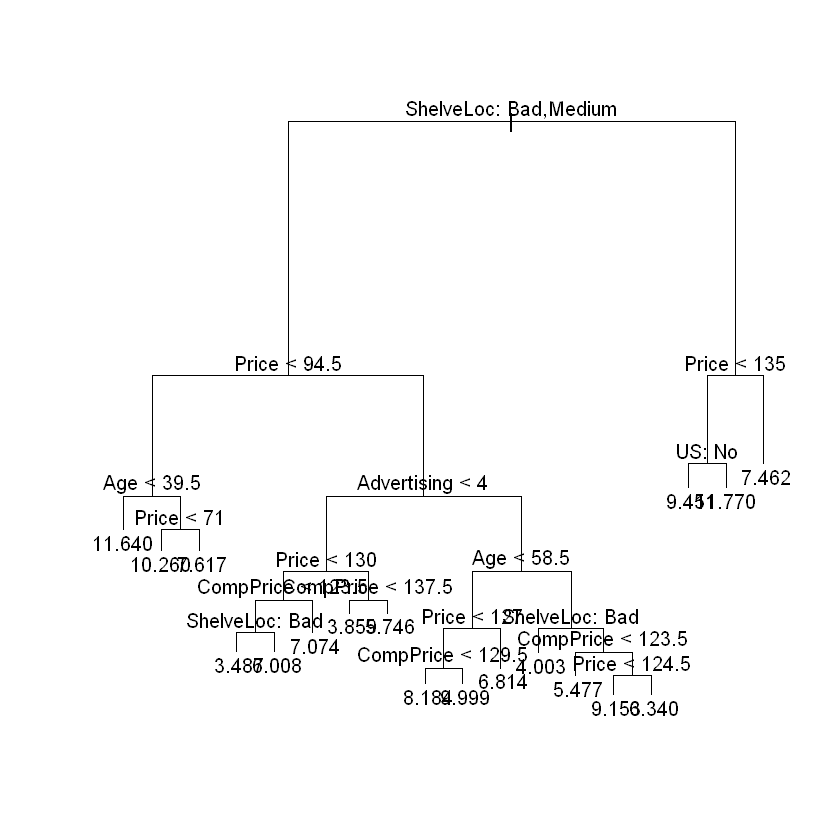

In [46]:
model_tree <- tree(Sales ~ ., data = car_train)
plot(model_tree)
text(model_tree, pretty=0)

In [47]:
summary(model_tree)


Regression tree:
tree(formula = Sales ~ ., data = car_train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

In [48]:
pred = predict(model_tree, newdata = car_test)
cat("MSE : ", mean((pred - car_test$Sales)^2))

MSE :  4.922039

(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

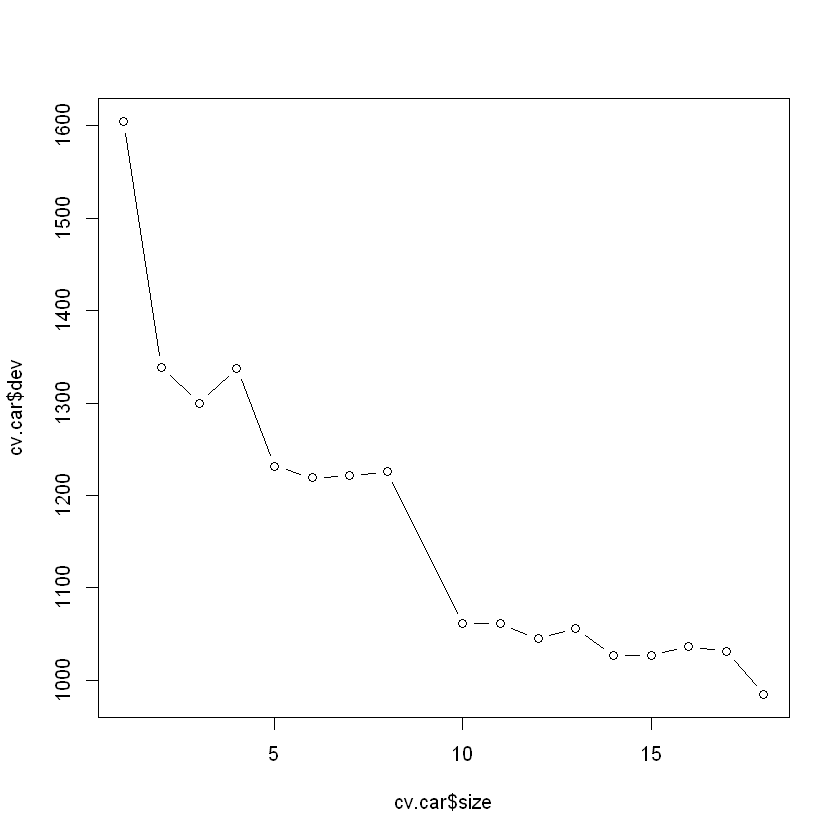

In [49]:
set.seed(1)
cv.car = cv.tree(model_tree)
plot(cv.car$size, cv.car$dev, type = "b")

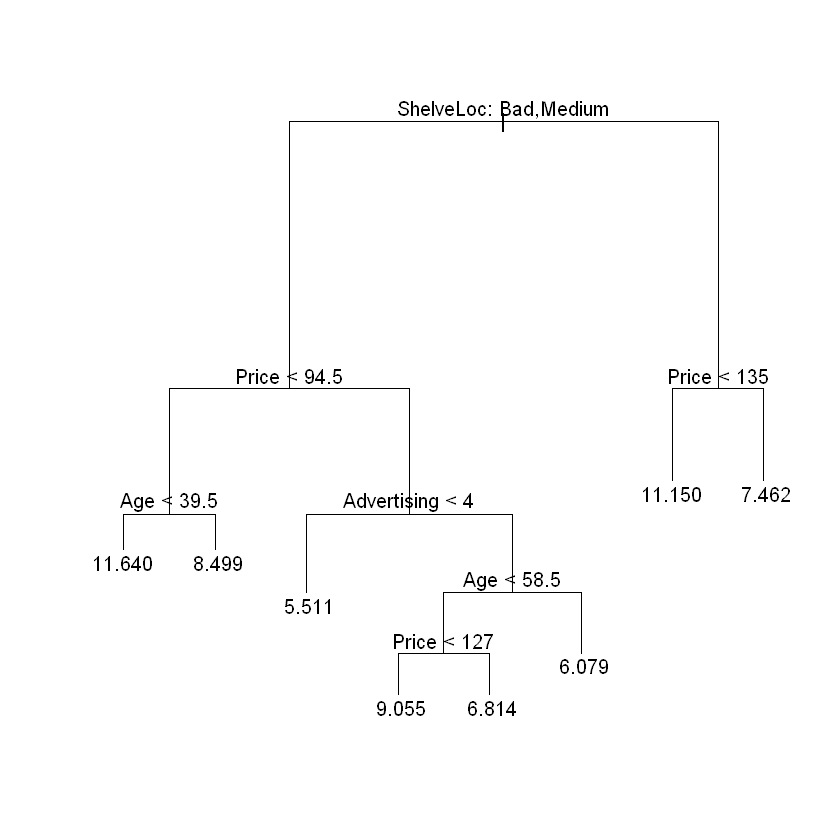

In [50]:
prune.car = prune.tree(model_tree, best = 8)
plot(prune.car)
text(prune.car,pretty=0)

In [51]:
pred = predict(prune.car, newdata= car_test)
cat("MSE : ", mean((pred - car_test$Sales)^2))

MSE :  5.113254

(d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important.

In [52]:
library(randomForest)

set.seed(1)

rf_model = randomForest(Sales~., data = car_train, mtry = 10, importance = TRUE)

In [53]:
pred = predict(rf_model, newdata = car_test)
cat("MSE : ", mean((pred - car_test$Sales)^2))

MSE :  2.605253

In [54]:
importance(rf_model)

,%IncMSE,IncNodePurity
CompPrice,24.8888481,170.182937
Income,4.7121131,91.264880
Advertising,12.7692401,97.164338
Population,-1.8074075,58.244596
Price,56.3326252,502.903407
ShelveLoc,48.8886689,380.032715
Age,17.7275460,157.846774
Education,0.5962186,44.598731
Urban,0.1728373,9.822082
US,4.2172102,18.073863


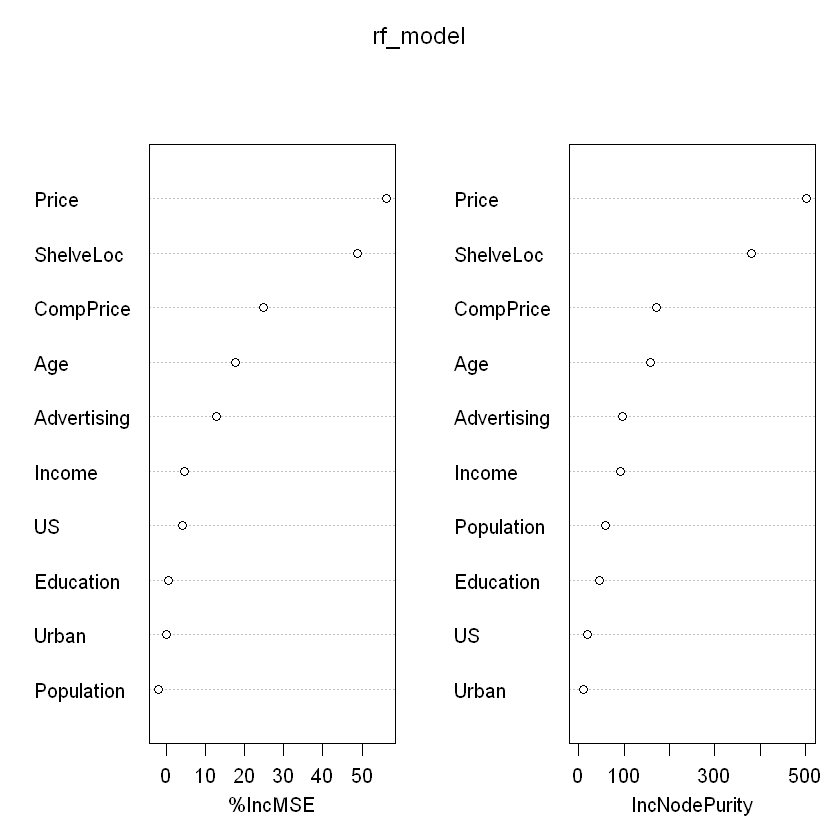

In [55]:
varImpPlot(rf_model)

(e) Use random forests to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of variables considered at each  split, on the error rate obtained.

In [56]:
set.seed(1)
rf_model = randomForest(Sales~., data = car_train, mtry = 3, importance = TRUE)
pred = predict(rf_model, newdata = car_test)
cat("MSE : ", mean((pred - car_test$Sales)^2))

MSE :  2.960559

### Exercise 9 Chapter 8 Page 334

This problem involves the OJ dataset which is part of the ISLR package.

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [60]:
library(ISLR)

set.seed(1)

train = sample(dim(OJ)[1],800)

OJ.train = OJ[train,]
OJ.test = OJ[-train,]

(b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

In [61]:
OJ.tree = tree(Purchase ~ ., data = OJ.train)
summary(OJ.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

Error Rate : 0.159

No. of terminal nodes : 9

(c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

Terminal node 21)

Split criteria : SpacialCH > 0.5

No. of observations : 15

Error (deviance) : 20.19

Decision : Classified as "CH"

Accuracy of classification : 60%

(d) Create a plot of the tree, and interpret the results.

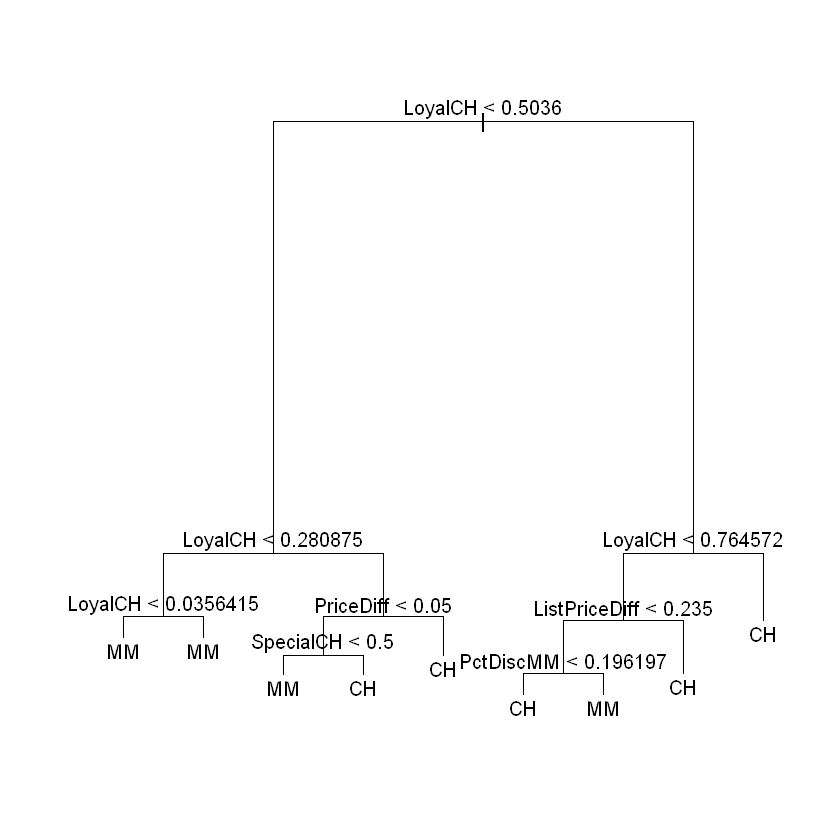

In [65]:
plot(OJ.tree)
text(OJ.tree,pretty=TRUE)

(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [66]:
tree.pred = predict(OJ.tree, newdata = OJ.test, type = "class")
table(tree.pred,OJ.test$Purchase)

         
tree.pred  CH  MM
       CH 160  38
       MM   8  64

In [67]:
cat("Accuracy : ", (160 + 64)/(160 + 38 + 8 + 64))

Accuracy :  0.8296296

(f) Apply the cv.tree() function to the training set in order to determine the optimal tree size.

In [68]:
cv.OJ = cv.tree(OJ.tree, FUN = prune.misclass)
cv.OJ

$size
[1] 9 8 7 4 2 1

$dev
[1] 150 150 149 158 172 315

$k
[1]       -Inf   0.000000   3.000000   4.333333  10.500000 151.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

(g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

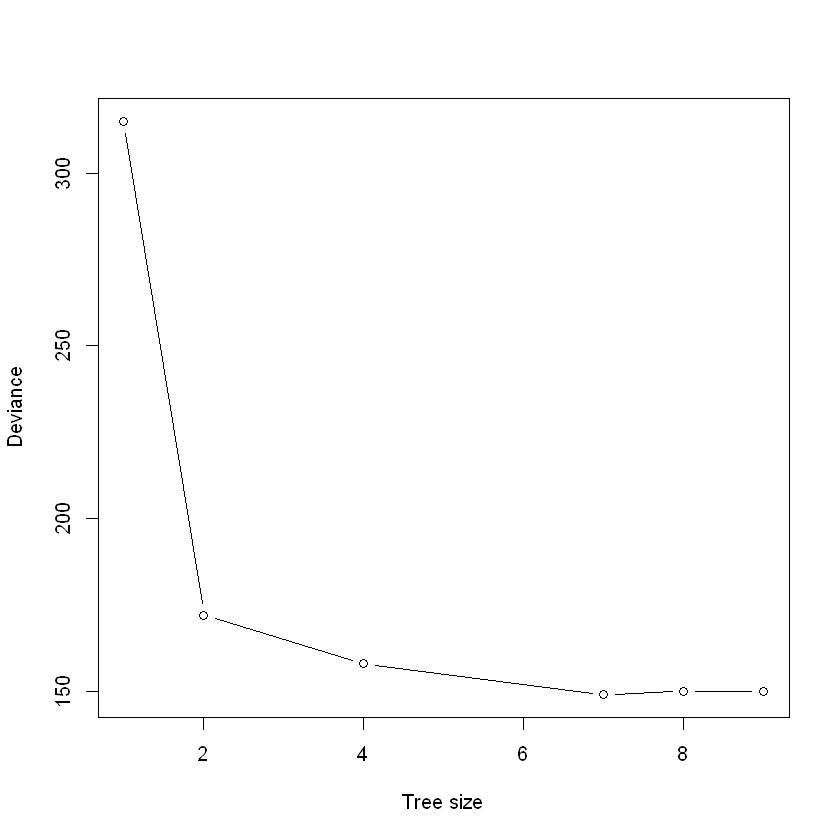

In [69]:
plot(cv.OJ$size, cv.OJ$dev, type='b', xlab = "Tree size", ylab = "Deviance")

(h) Which tree size corresponds to the lowest cross-validated classification error rate?

A tree size of 7 gives the smallest error rate

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

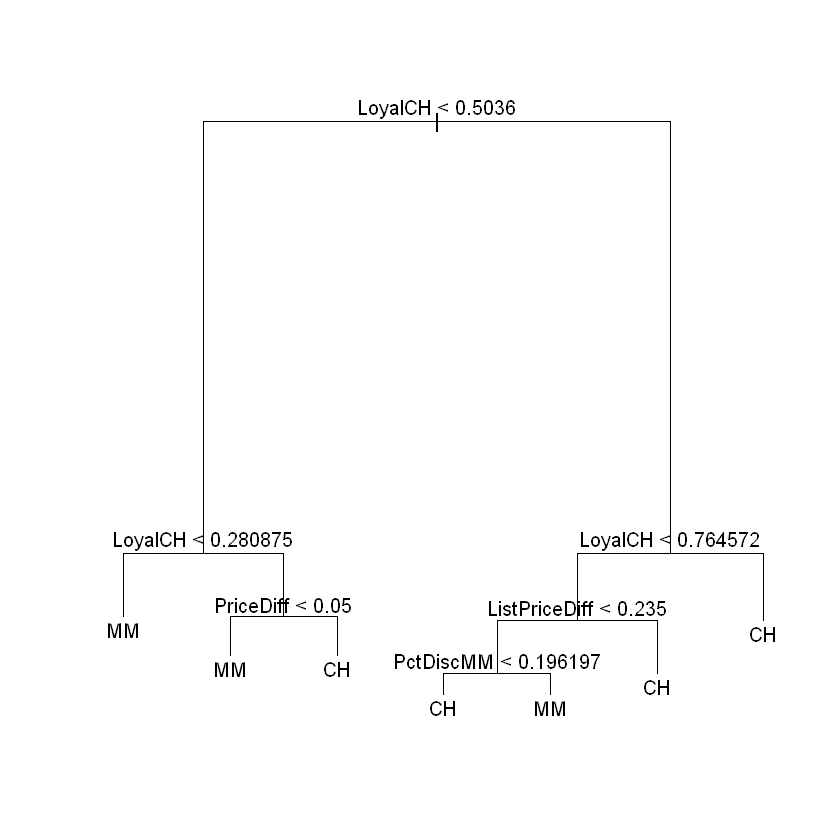

In [70]:
prune.OJ = prune.misclass(OJ.tree, best=5)
plot(prune.OJ)
text(prune.OJ,pretty=0)

(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [71]:
tree.pred = predict(prune.OJ, newdata = OJ.train, type = "class")
table(tree.pred, OJ.train$Purchase)

         
tree.pred  CH  MM
       CH 441  86
       MM  44 229

In [72]:
cat("Accuracy : ", (441 + 229)/(441 + 86 + 44 + 229))

Accuracy :  0.8375

(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [73]:
tree.pred = predict(prune.OJ, newdata = OJ.test, type = "class")
table(tree.pred, OJ.test$Purchase)

         
tree.pred  CH  MM
       CH 160  36
       MM   8  66

In [74]:
cat("Accuracy : ", (160 + 66)/(160 + 36 + 8 + 66))

Accuracy :  0.837037

### Exercise 10 Chapter 8 Page 334

We now use boosting to predict Salary in the Hitters dataset.

(a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [75]:
data("Hitters")

Hitters %>%
    filter(!is.na(Salary)) %>%
    mutate(logSalary = log(Salary)) %>%
    select(-Salary) -> Hitters

(b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [76]:
training <- Hitters[1:200,]
testing <- Hitters[-(1:200),]

(c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

In [79]:
train_loss <- c()
test_loss <- c()
gbm_models <- list()
shrink_params <- seq(0.001, 0.1, length.out = 20)

for (i in seq(shrink_params)) {
    set.seed(1)
    gbm_models[[i]] <- gbm(logSalary ~ ., 
                           data = training, 
                           distribution = 'gaussian',
                           shrinkage = shrink_params[i], 
                           n.cores = 3, 
                           n.trees = 1000)
    pred_train <- predict(gbm_models[[i]], training, n.trees = 1000)
    pred_test <- predict(gbm_models[[i]], testing, n.trees = 1000)
    
    resid_train <- (training$logSalary - pred_train)^2
    resid_test <- (testing$logSalary - pred_test)^2
    
    rmse_train <- sqrt(mean(resid_train))
    rmse_test <- sqrt(mean(resid_test))
    
    train_loss[i] <- rmse_train
    test_loss[i] <- rmse_test
}


data_frame(train = train_loss,
           test = test_loss) %>%
    mutate(id = row_number(), shrinkage = shrink_params[id]) %>%
    gather(value_type, value, train, test) %>%
    ggplot(aes(shrinkage, value, col = value_type)) + 
    geom_point() + labs(x = 'Shrinkage', y = 'Error', 
                        title = 'Learning Curve for GBM Model') +
    geom_line(alpha = 0.5) +
    geom_vline(xintercept = shrink_params[which.min(test_loss)], 
               col = 'grey50', lty = 2) +
    geom_hline(yintercept = min(test_loss), col = 'grey50', lty = 2) +
    scale_color_manual(name = 'Error Type', 
                       labels = c('Test', 'Train'),
                       values = c('#56B4E9', '#E69F00')) +
    scale_x_continuous(breaks = c(round(shrink_params[which.min(test_loss)], 2), 
                                  seq(0, 0.1, 0.025)[-4])) +
    theme_tufte()

ERROR: Error in theme_tufte(): could not find function "theme_tufte"


(d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

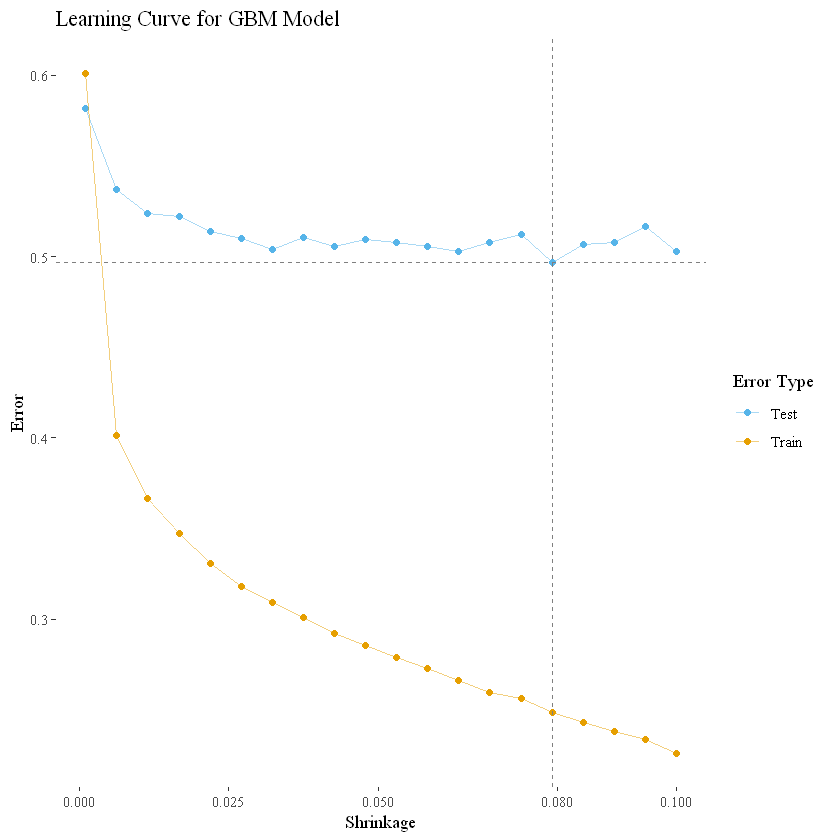

In [83]:
data_frame(train = train_loss,
           test = test_loss) %>%
    mutate(id = row_number(), shrinkage = shrink_params[id]) %>%
    gather(value_type, value, train, test) %>%
    ggplot(aes(shrinkage, value, col = value_type)) + 
    geom_point() + labs(x = 'Shrinkage', y = 'Error', 
                        title = 'Learning Curve for GBM Model') +
    geom_line(alpha = 0.5) +
    geom_vline(xintercept = shrink_params[which.min(test_loss)], 
               col = 'grey50', lty = 2) +
    geom_hline(yintercept = min(test_loss), col = 'grey50', lty = 2) +
    scale_color_manual(name = 'Error Type', 
                       labels = c('Test', 'Train'),
                       values = c('#56B4E9', '#E69F00')) +
    scale_x_continuous(breaks = c(round(shrink_params[which.min(test_loss)], 2), 
                                  seq(0, 0.1, 0.025)[-4])) +
    theme_tufte()

(e) Compare the test MSE of boosting to the test MSE that results from  applying  two  of  the  regression  approaches  seen  in Chapters 3 and 6.

In [80]:
trControl <- trainControl(method = 'cv', number = 10)
dummy_func <- dummyVars(logSalary ~ . , data = training)
training_onehot <- predict(dummy_func, training)
testing_onehot <- predict(dummy_func, testing)

preObj <- preProcess(training_onehot, method = c('center', 'scale'))

training_onehot <- predict(preObj, training_onehot)
testing_onehot <- predict(preObj, testing_onehot)

set.seed(1)
glm_model <- train(x = training_onehot, y = training[,20],
                   method = 'glmnet', 
                   trControl = trControl,
                   tuneGrid = expand.grid(alpha = seq(0, 1, length.out = 8),
                                          lambda = c(seq(0, 1, length.out = 4),
                                                     seq(1, 10, length.out = 4))))


postResample(predict(glm_model, testing_onehot), testing$logSalary)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


RMSE  Rsquared       MAE 
0.6710889 0.3262483 0.5159527

(f) Which variables appear to be the most important predictors in the boosted model?

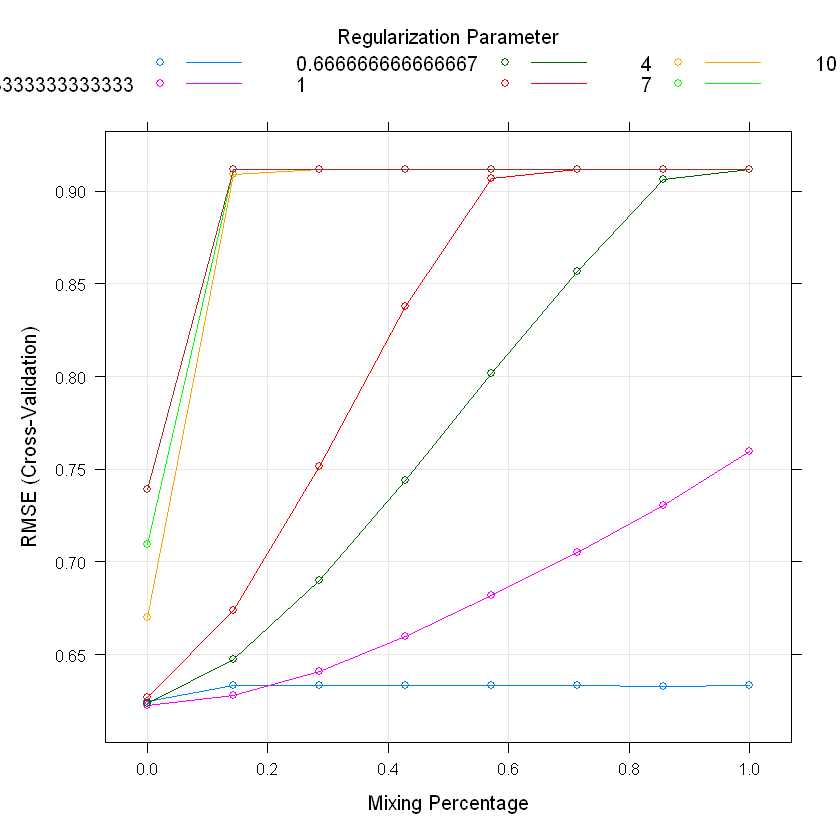

In [81]:
plot(glm_model)

(g) Now apply bagging to the training set. What is the test set MSE for this approach?

In [82]:
bag_model <- train(training_onehot, training[,20],
                   method = 'treebag',
                   trControl = trControl)

postResample(predict(bag_model, testing_onehot), testing$logSalary)

RMSE  Rsquared       MAE 
0.5441488 0.5702585 0.3405947